In [ ]:
from bs4 import BeautifulSoup
from requests import get
import time
import random
import csv

In [ ]:
houses = []


with open('move.csv', 'w') as csvfile:
    
    count = 1
    while count <= 6:
        url = 'https://move.ru/kvartiry_na_sutki/?page=' + str(count) + '&limit=100'
        response = get(url)
        html_soup = BeautifulSoup(response.text, 'html.parser')

        house_data = html_soup.find('div', class_='container main items-page').findAll('div', class_='search-item move-object')
        if house_data != []:
            houses.extend(house_data)
            value = random.random()
            scaled_value = 1 + (value * (9 - 5))
            time.sleep(scaled_value)
        else:
            break
        count += 1
    

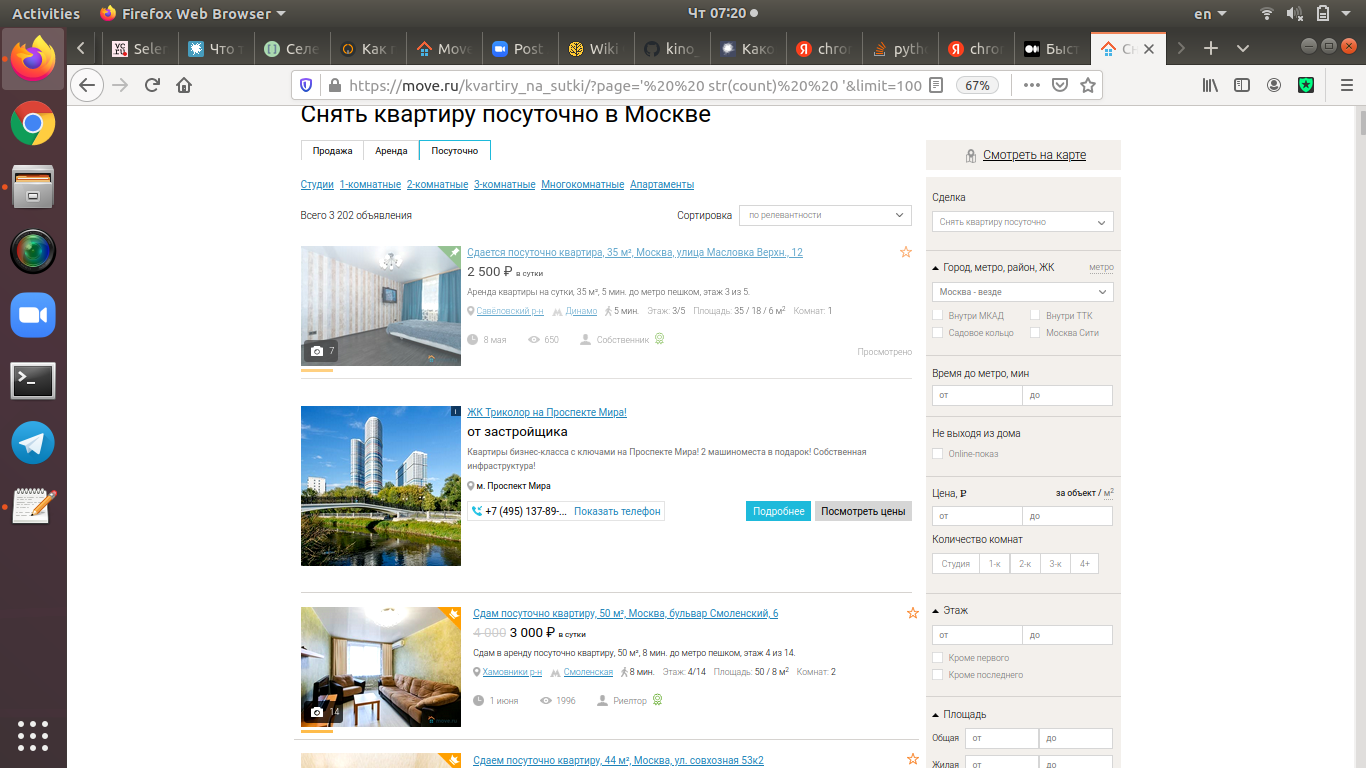

In [8]:
from IPython.display import Image
Image(filename='/home/lizaveta/Pictures/1.png')

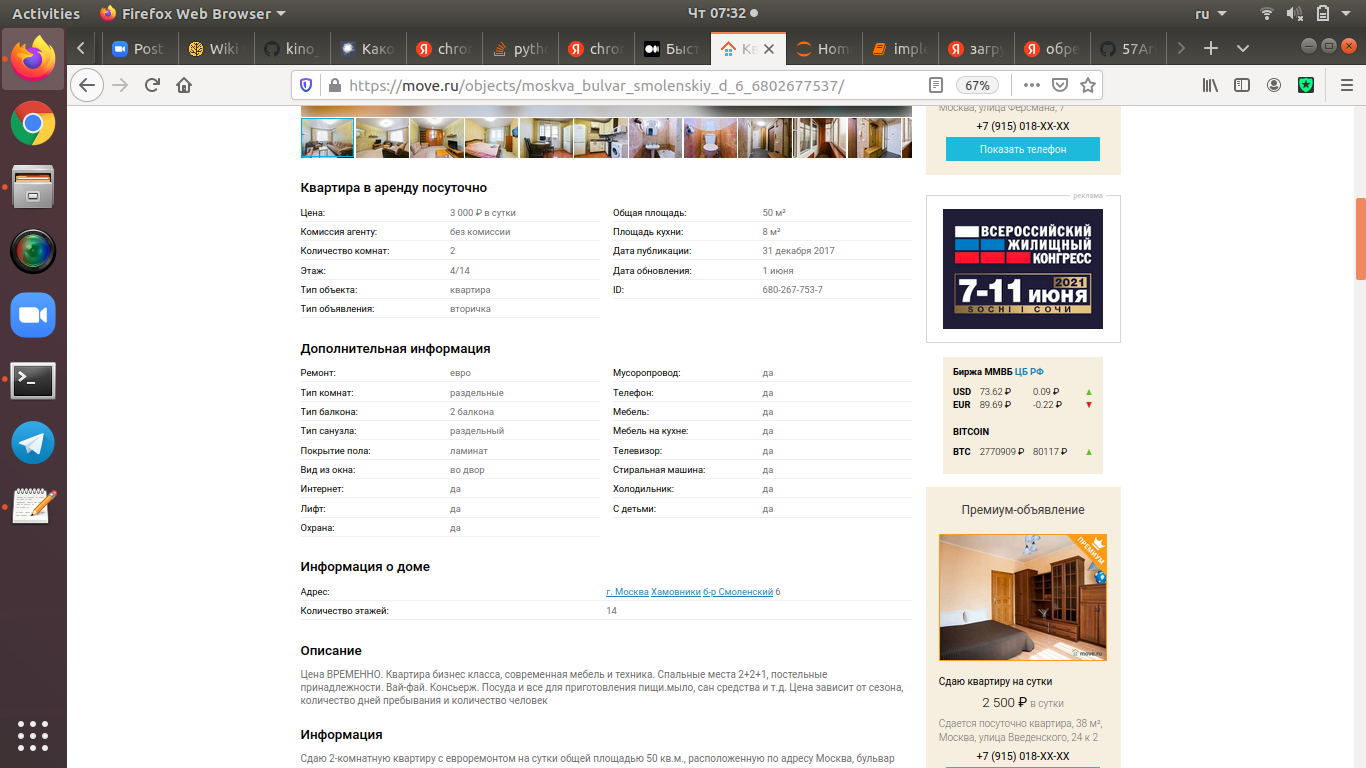

In [9]:
Image(filename='/home/lizaveta/Pictures/3.png')

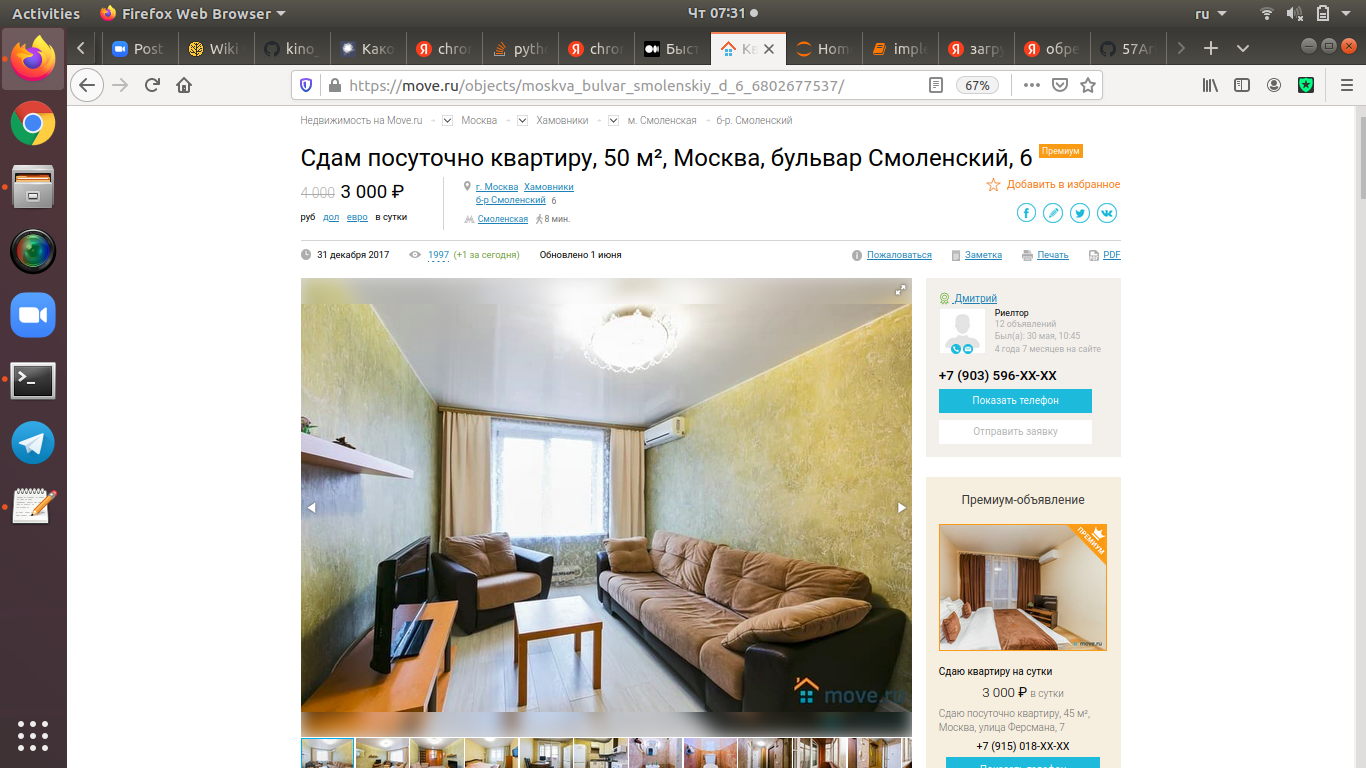

In [10]:
Image(filename='/home/lizaveta/Pictures/2.png')

In [ ]:
    fieldnames = ['title', 'address', 'price', 'floor', 'overall floor', 'rooms', 'square', 'images', 'link']
	writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
	writer.writeheader()
	
	n = int(len(houses)) - 1
	count = 0
	while count <= n:  # count <= n
		try:

			title = address = price = overall_floor = rooms = floor = square = link = ''
			
			info = houses[int(count)]
			
			title = info.find('a', {"class":"search-item__title-link search-item__item-link"}).text
			title = title.replace(',', '')
			
			link = 'https:' + info.find('a', {"class":"search-item__title-link search-item__item-link"}).get('href')
			response = get(link)
			html_soup = BeautifulSoup(response.text, 'html.parser')
			
			# IMAGES
			images = []
			for img in html_soup.find('div', class_='images-slider_fotorama js-fotorama-init images-slider__fotorama-only-slides').findAll('a'):
				images.append(img.get('href'))
			
			
			# INFO
			
			details = html_soup.findAll('ul', class_='object-info__details-table')
		
			info = details[0].findAll('div', class_='object-info__details-table_property_value')

			price = info[0].text
			price = price[:-10]

			rooms = info[2].text
			if len(rooms) != 1:
				rooms = ''

			info_floors = info[3].text
			sl = info_floors.find('/')
			if sl != -1:
				floor = info_floors[:sl]
				overall_floor = info_floors[(sl+1):]

			
			info = details[1].findAll('div', class_='object-info__details-table_property_value')

			square = info[0].text
			if square[-2] == 'м':
				square = square[:-3]
			else:
				square = ''
			
			info = details[4].findAll('div', class_='object-info__details-table_property_value')
			info_address = info[0].text
			address = ', '.join(info_address.split('\n'))
			address = address.replace(',', '')
			
			csv_table = {'title':title, 'address':address, 'price':price, 'rooms':rooms, 'floor':floor, 'overall floor':overall_floor,'square':square, 'images':images, 'link':link}
			
			writer.writerow(csv_table)
			
			
		except AttributeError or IndexError:
			pass
			
		count += 1